In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('insurance.csv')

In [4]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


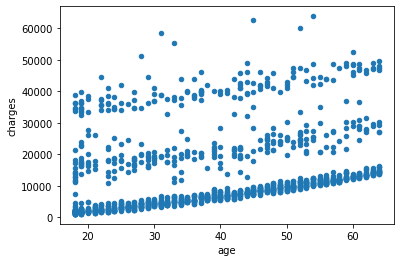

In [5]:
df.plot(kind='scatter', x='age', y='charges');

In [6]:
#extract age and charges columns
age_col = df['age'].values
charges_col = df['charges'].values

#reshape
age_col = age_col.reshape(-1,1)
charges_col = charges_col.reshape(-1,1)

In [7]:
#split data
x_train, x_test, y_train, y_test = train_test_split(age_col, charges_col, test_size=0.33, random_state=42)

In [8]:
#model
LR_model = LinearRegression()

#train model
LR_model.fit(x_train, y_train)

#predict on test
y_pred = LR_model.predict(x_test)

In [9]:
print("R2 score value: ")
print(r2_score(y_test, y_pred))

R2 score value: 
0.10133866336919395


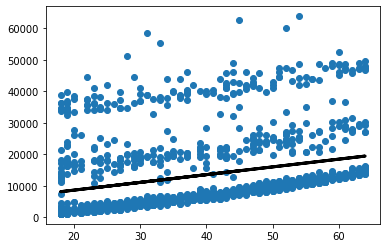

In [10]:
plt.scatter(age_col, charges_col)
plt.plot(x_test, y_pred, color = 'black', linewidth=3, label = 'Regression Line')


Multivariate Linear Regression (aka shlav bet)

In [11]:
df2 = pd.read_csv('insurance.csv')

In [12]:
df2.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
def smoker_function(x):
    if x == "yes":
        return 1
    return 0
def male_function(x):
    if x == "male":
        return 1
    return 0
def female_function(x):
    if x == "female":
        return 1
    return 0

In [15]:
df2["isSmoker"] = df2["smoker"].apply(smoker_function)
df2["isMale"] = df2["sex"].apply(male_function)
df2["isFemale"] = df2["sex"].apply(female_function)

In [16]:
X = df2[["age","bmi","isSmoker", "isMale", "isFemale"]].values
y = df2["charges"].values
y = y.reshape(-1,1)

In [17]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.33, random_state=42)

In [18]:
LR_model2 = LinearRegression()
LR_model2.fit(x_train2, y_train2)
y_pred2 = LR_model2.predict(x_test2)

(442, 1)

In [20]:
print("R2 score value: ")
print(r2_score(y_test2, y_pred2))

R2 score value: 
0.7551179923391564


בשלב הראשון השימוש במשתנה אחד לא היה מספיק על מנת לתת חיזוי מספיק טוב, בגלל שראו רק "חלק קטן מהתמונה".
בשלב השני השימוש בכמה משתנים נתנו תמונה יותר מלאה, מה שנתן למחשב את האפשרות לחזות את המחיר טוב יותר.
ככל שיש יותר נתונים שמשפיעים על התוצאה המחשב יותר יכול למצוא תבנית בנתונים ולתת תוצאות יותר טובות. 